## Import Tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__) #outputs the version of tensorflow.

2.17.0


**Example 3.9.1**

Ridge Regression using TensorFlow with sklearn breast cancer database.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

sess = tf.Session() # create a session
cancer_ds = datasets.load_breast_cancer() # load the breast cancer dataset
X = cancer_ds.data[:,0] # radius mean
Y = cancer_ds.data[:,1] # texture mean
x_vals = np.array(X)
y_vals = np.array(Y)
print(X.shape)
print(Y.shape)
print(cancer_ds.DESCR) # print the description of the dataset



Instructions for updating:
non-resource variables are not supported in the long term
(569,)
(569,)
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.

## Define the variables

In [3]:
batch_size = 64 # number of samples in each batch
learning_rate = 0.00001 # learning rate for gradient descent
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32) #creating a placeholder for input data (features)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32) ##creating a placeholder for target values (labels)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
model_output = tf.add(tf.matmul(x_data, A), b)



## Declare the Ridge loss function

In [4]:
# Ridge loss function = L2_loss + L2 norm of slope
ridge_param = tf.constant(1.)
ridge_loss = tf.reduce_mean(tf.square(A))
loss = tf.expand_dims(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), tf.multiply(ridge_param, ridge_loss)), 0)

init = tf.global_variables_initializer()
sess.run(init)



## Initialize the optimizer

In [5]:
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

loss_vec = []
for i in range(1000):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%200==0:
        print('Epoch #' + str(i+1) + ' Loss = ' + str(temp_loss))

# Obtain the optimal coefficients
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

# Obtain the best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)



Epoch #200 Loss = [207.77025]
Epoch #400 Loss = [71.067764]
Epoch #600 Loss = [50.35572]
Epoch #800 Loss = [41.985783]
Epoch #1000 Loss = [28.992132]


## Plot the result

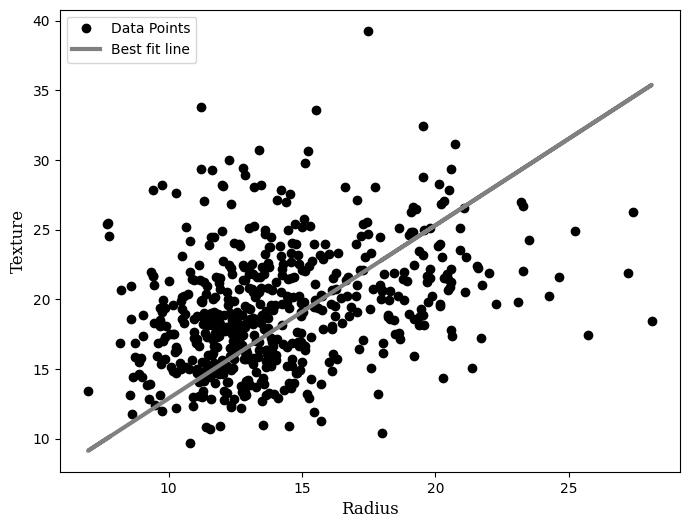

In [6]:

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(x_vals, y_vals, 'ko', label='Data Points')
plt.plot(x_vals, best_fit, color='gray', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
label_font = {'size':'12'}
csfont = {'fontname':'serif'}
plt.xlabel('Radius',fontdict=label_font,**csfont)
plt.ylabel('Texture',fontdict=label_font,**csfont)
fig.savefig("Data/ridgereg.pdf") #save the figure.
plt.show()